<a href="https://colab.research.google.com/github/esperonj/Equipo26/blob/main/Pruebas_YOLO%2BOCR_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 151.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 132.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [13]:

# Carga del modelo
model = YOLO("/content/drive/MyDrive/YOLOv8_resultados50EPOCH/train/weights/best.pt")

# Leer imagen original
image = cv2.imread("/content/drive/MyDrive/nuevas_imagenes/IMG_6185.JPG")

# Inferencia
results = model(image)[0]  # Obtiene el primer resultado


0: 640x480 2 etiquetas, 68.7ms
Speed: 3.2ms preprocess, 68.7ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 480)


In [14]:
boxes = results.boxes.xyxy.cpu().numpy()  # Coordenadas (x1, y1, x2, y2)
cropped_images = []

for i, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box)
    cropped = image[y1:y2, x1:x2]
    cropped_images.append(cropped)

In [15]:
!pip install easyocr

In [16]:
import os
import numpy as np
import pandas as pd
import re
import cv2
import matplotlib.pyplot as plt
import time
from PIL import Image
import easyocr

reader = easyocr.Reader(['en'])  # Agrega 'es' si hay texto en español

for i, crop in enumerate(cropped_images):
    ocr_result = reader.readtext(crop)
    print(f"OCR resultado #{i+1}:")
    for detection in ocr_result:
        text = detection[1]
        print("  →", text)

OCR resultado #1:
  → CleanCell
  → REF] (240)11662970122
  → UDI
  → Loq] (10184500201
  → 2026-09-80
  → 2024.10.16
  → GTN (01)04015630899623
  → 04
  → Rocho _
OCR resultado #2:
  → CleanCell
  → REF] (240111682970122


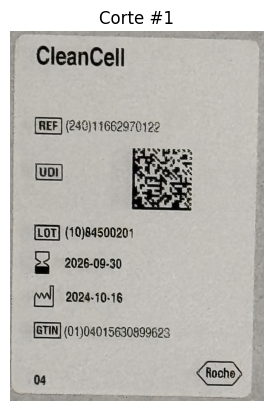

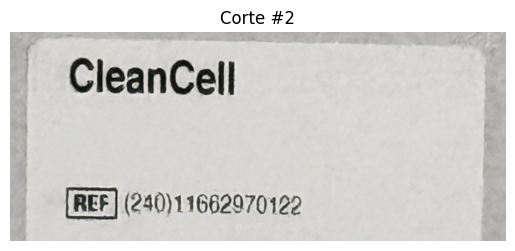

In [17]:
from matplotlib import pyplot as plt

for i, crop in enumerate(cropped_images):
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    plt.title(f"Corte #{i+1}")
    plt.axis('off')
    plt.show()